#Imports


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression,Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor




#Regression

##Data reading for regression

In [ ]:

#dataset read
dataset = pd.read_csv('/content/drive/MyDrive/secondYear/5CS037 - Concepts and Technologies of AI. /Coursework/diamonds.csv')
df = pd.DataFrame(dataset)


In [ ]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB
None


In [ ]:
# printing few dataset

df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


##Data cleaning

In [ ]:
df = df.dropna()
print("\nMissing Values:")
print(df.isnull().sum())

print("\nNumber of duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()
print("Number of rows after removing duplicates:", len(df))



Missing Values:
Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

Number of duplicate rows: 0
Number of rows after removing duplicates: 53940


## Statistics

In [ ]:
summary_stats = df['price'].describe()
print(summary_stats)


count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64


In [ ]:
correlation = df['price'].corr(df['carat'])
print(f"Correlation between Price and Carat: {correlation:.2f}")


Correlation between Price and Carat: 0.92


##Data Visualization


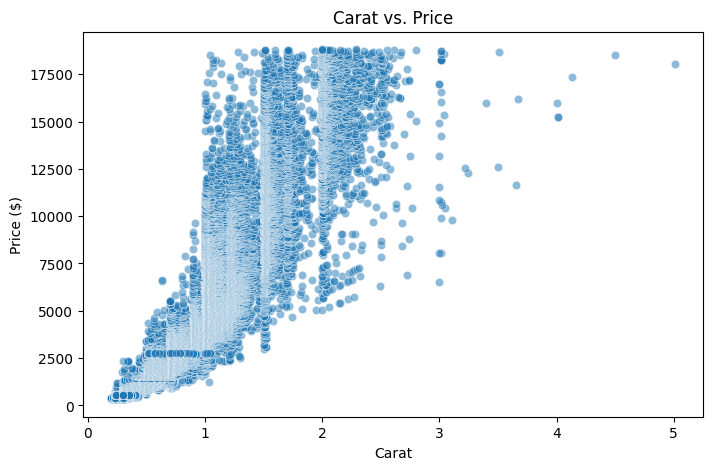

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["carat"], y=df["price"], alpha=0.5)
plt.xlabel("Carat")
plt.ylabel("Price ($)")
plt.title("Carat vs. Price")
plt.show()


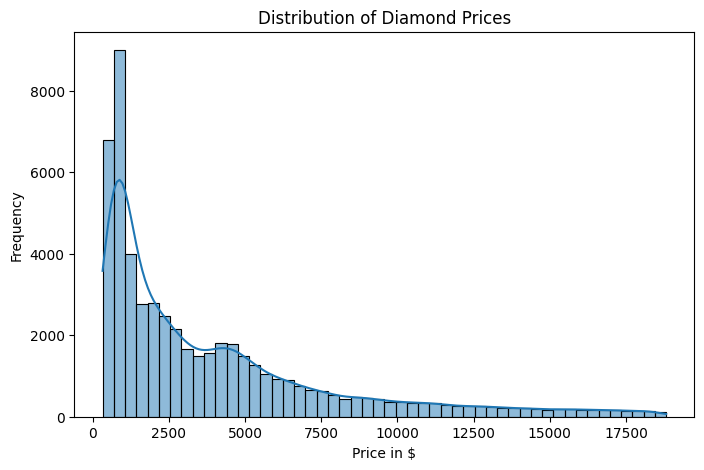

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Distribution of Diamond Prices")
plt.xlabel("Price in $")
plt.ylabel("Frequency")
plt.show()

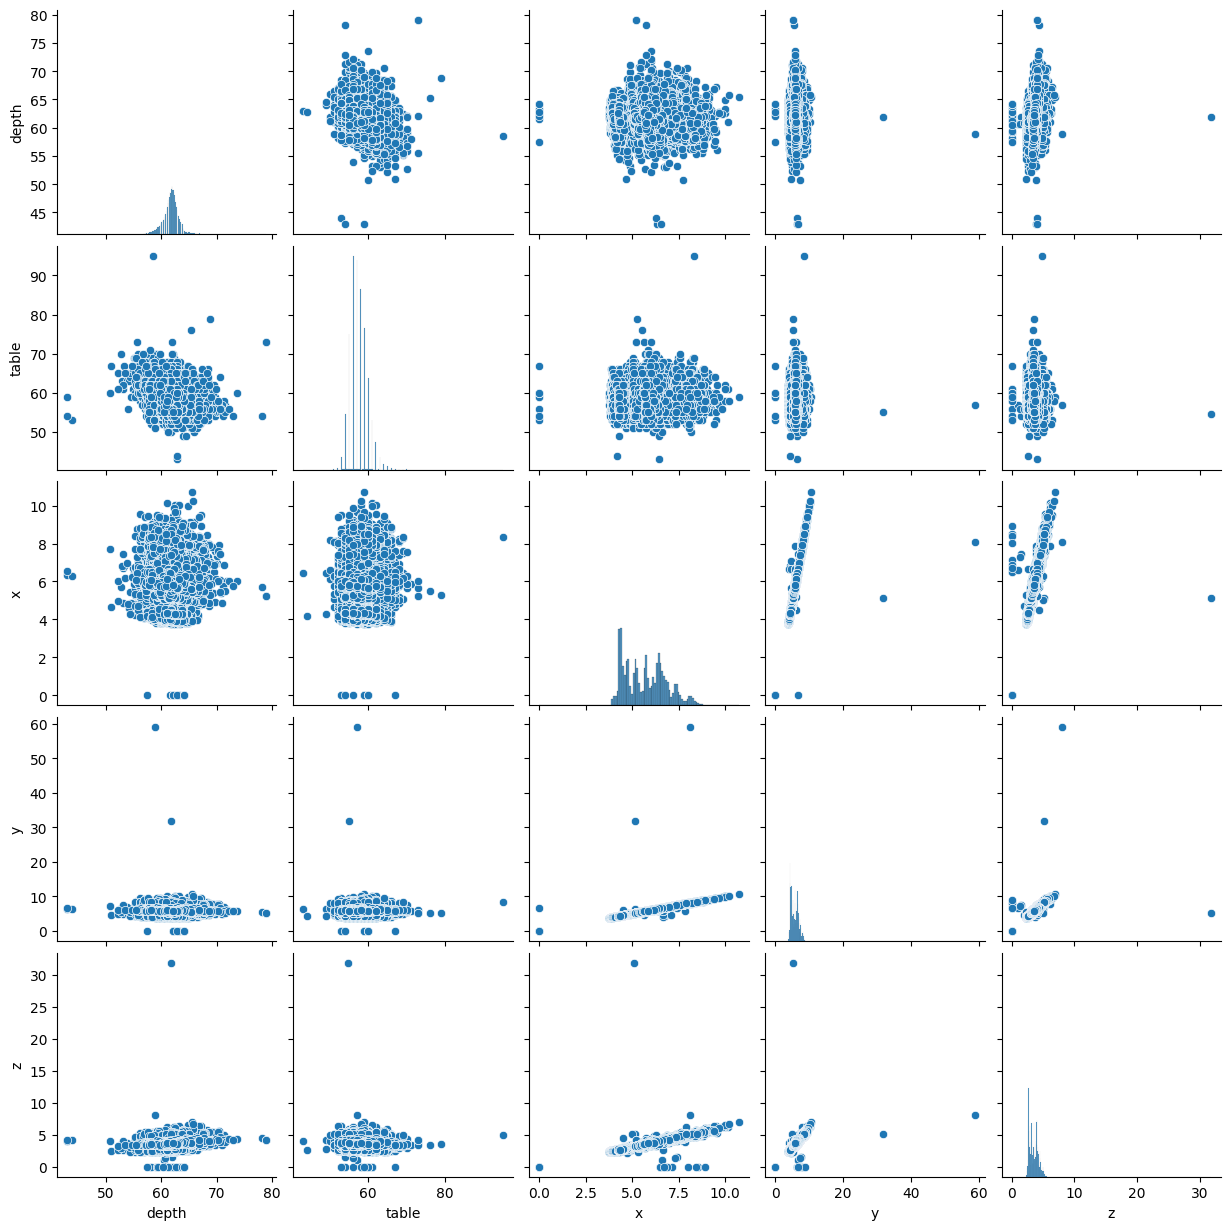

In [ ]:
sns.pairplot(df[["depth", "table", "x", "y","z"]])
plt.show()

<ipython-input-3-73b8c34cfdba>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_cut.index, y=avg_price_by_cut.values, palette="viridis")


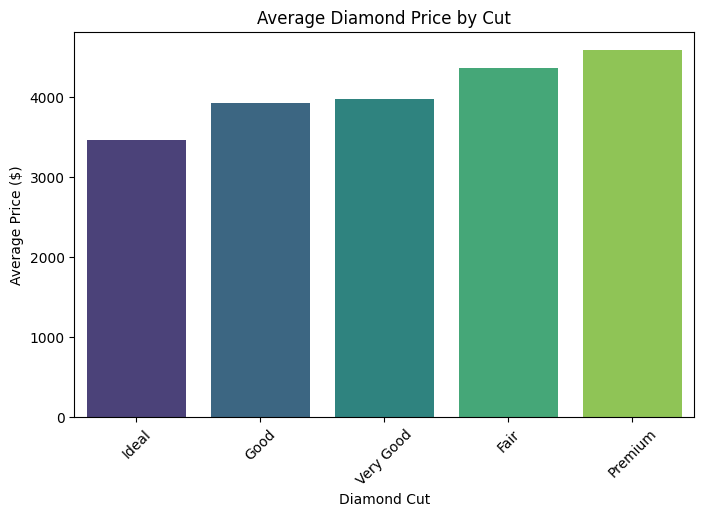

In [ ]:
# Group by Cut and calculate average price
avg_price_by_cut = df.groupby('cut')['price'].mean().sort_values()

# Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_price_by_cut.index, y=avg_price_by_cut.values, palette="viridis")
plt.xlabel("Diamond Cut")
plt.ylabel("Average Price ($)")
plt.title("Average Diamond Price by Cut")
plt.xticks(rotation=45)
plt.show()

<ipython-input-4-45d46d0b8f05>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["clarity"], y=df["price"], palette="coolwarm")


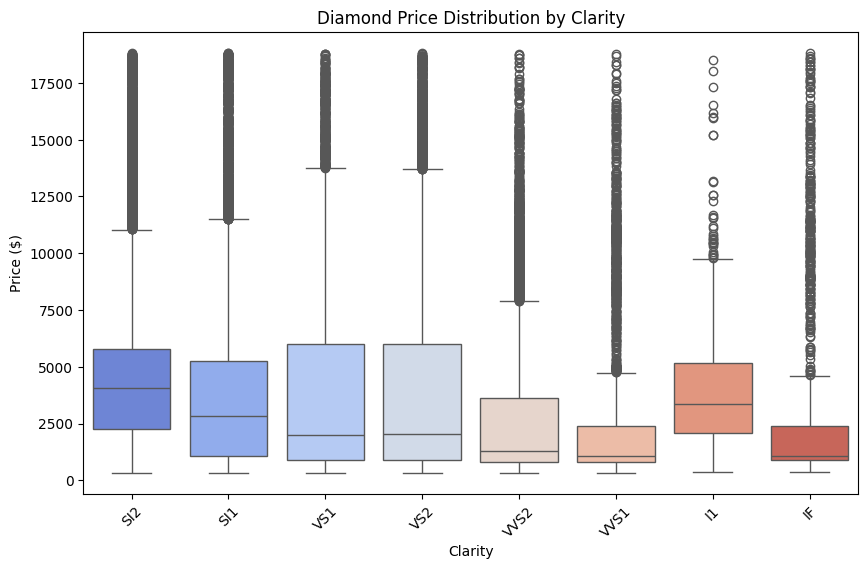

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["clarity"], y=df["price"], palette="coolwarm")
plt.xlabel("Clarity")
plt.ylabel("Price ($)")
plt.title("Diamond Price Distribution by Clarity")
plt.xticks(rotation=45)
plt.show()


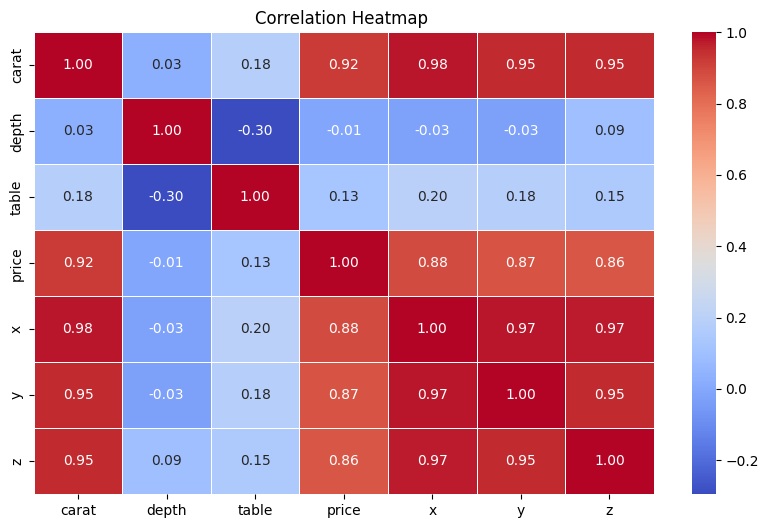

In [ ]:
numeric_df = df.select_dtypes(include=['number']).iloc[:, 1:]
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap ")
plt.show()


##Data separation

In [ ]:
X = df.drop(columns=["price"])
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a bias term (column of ones) to the features matrix
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Initialize weights to 0
weights = np.zeros(X_train.shape[1])


##Model From Scratch

In [ ]:
def compute_cost(X, Y, W):
    """ Parameters:
    This function finds the Mean Square Error.
    Input parameters:
      X: Feature Matrix
      Y: Target Matrix
      W: Weight Matrix
    Output Parameters:
      J: accumulated mean square error.
    """
    # Number of samples
    m = X.shape[0]
    #predicted values(Y_pred = np.matmul(X,W))
    Y_pred = np.matmul(X, W)
    # Compute the squared errors
    squared_errors = (Y_pred - Y) ** 2
    return (1 / (2 * m)) * np.sum(squared_errors)

# Gradient Descent Function
def gradient_descent(X, Y, W, alpha, iterations):
    cost_history = []
    m = len(Y)

    for iteration in range(iterations):
        # Hypothesis Values
        Y_pred = np.matmul(X, W)
        # Difference b/w Hypothesis and Actual Y
        loss = Y_pred - Y
        dw = (1 / m) * np.matmul(X.T, loss)  # Gradient calculation
        W = W - alpha * dw  # Weight update

        # New Cost Value
        cost = compute_cost(X, Y, W)
        cost_history.append(cost)

    return W, cost_history

# RMSE Calculation
def rmse(Y_true, Y_pred):
    return np.sqrt(np.mean((Y_true - Y_pred) ** 2))

# R-squared Calculation
def r2(Y_true, Y_pred):
    # np.mean(Y_true) = mean of y true
    ss_total = np.sum((Y_true - np.mean(Y_true)) ** 2)
    ss_residual = np.sum((Y_true - Y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

# Train-Test Split Function
def train_test_split_scratch(X, y, test_size=0.2, random_seed=42):
    """
    Splits dataset into train and test sets.

    Arguments:
    X : np.ndarray
        Feature matrix.
    y : np.ndarray
        Target array.
    test_size : float
        Proportion of the dataset to include in the test split (0 < test_size < 1).
    random_seed : int
        Seed for reproducibility.

    Returns:
    X_train, X_test, y_train, y_test : np.ndarray
        Training and testing splits of features and target.
    """
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    test_size = int(len(X) * test_size)
    test_indices, train_indices = indices[:test_size], indices[test_size:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

def main():
    # Load Dataset
    # Label Encoding for Categorical Columns
    label_encoder = LabelEncoder()
    categorical_columns = []


    # Define Features and Target
    feature_cols = []
    X = df[feature_cols].values
    Y = df['price'].values.reshape(-1, 1)  # Convert to column vector

    mean_X = np.mean(X, axis=0)
    std_X = np.std(X, axis=0)
    X = (X - mean_X) / (std_X + 1e-8)

    X = np.c_[np.ones(X.shape[0]), X]

    X_train, X_test, Y_train, Y_test = train_test_split_scratch(X, Y, test_size=0.2, random_seed=42)

    W = np.zeros((X_train.shape[1], 1))

    # Hyperparameters
    alpha = 0.01  # Learning Rate
    iterations = 1000  # Number of Iterations

    # Train the Model using Gradient Descent
    W_optimal, cost_history = gradient_descent(X_train, Y_train, W, alpha, iterations)

    # Make Predictions
    Y_pred = np.dot(X_test, W_optimal)

    # Evaluate Model
    model_rmse = rmse(Y_test, Y_pred)
    model_r2 = r2(Y_test, Y_pred)

    # Output Results
    print("Final Weights (including bias):", W_optimal.flatten())
    print("Cost History (First 10 iterations):", cost_history[:10])
    print("RMSE on Test Set:", model_rmse)
    print("R-Squared on Test Set:", model_r2)

# Execute the main function
if __name__ == "__main__":
    main()


Final Weights (including bias): [3939.32063454]
Cost History (First 10 iterations): [15565242.99733858, 15413896.062194156, 15265560.931059107, 15120177.66903364, 14977687.53392248, 14838032.95250004, 14701157.4972479, 14567005.863555288, 14435523.847373147, 14306658.32331303]
RMSE on Test Set: 3987.220752951641
R-Squared on Test Set: -6.969201434570138e-05


##Primary Model

In [ ]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=['price']).values
y = df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (43152, 10)
X_test shape: (10788, 10)
y_train shape: (43152,)
y_test shape: (10788,)


In [ ]:

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

numerical_cols.remove('price')

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical = encoder.fit_transform(df[categorical_cols])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))

scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(df[numerical_cols])
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_cols)

X = pd.concat([scaled_numerical_df, encoded_categorical_df], axis=1)
X.insert(0, 'Intercept', 1)

y = df['price'].values.reshape(-1, 1)

X_np = X.values
y_np = y

X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.3, random_state=42)

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

rmse_library = np.sqrt(np.mean((y_test - y_pred) ** 2))

mse_library = np.mean((y_test - y_pred) ** 2)

mae_library = np.mean(np.abs(y_test - y_pred))

r2_library = ridge.score(X_test, y_test)

print(f"RMSE: {rmse_library}")
print(f"MSE: {mse_library}")
print(f"MAE: {mae_library}")
print(f"R² Score: {r2_library}")


RMSE: 5469.985955759538
MSE: 29920746.35620659
MAE: 4013.3260353062324
R² Score: 0.9206226715690513


In [ ]:

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

y_pred_linear = linear_reg_model.predict(X_test)
y_traina = y_train.ravel()
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred_rf = random_forest_model.predict(X_test)

print("Linear Regression:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_linear))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_linear))
print("R-squared (R2):", r2_score(y_test, y_pred_linear))
print("\nRandom Forest Regression:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_rf))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_rf))
print("R-squared (R2):", r2_score(y_test, y_pred_rf))


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Linear Regression:
Mean Squared Error (MSE): 1238015.3387700708
Mean Absolute Error (MAE): 734.0152467397219
R-squared (R2): 0.9206195019546656

Random Forest Regression:
Mean Squared Error (MSE): 1558.0443567235197
Mean Absolute Error (MAE): 3.468673217154869
R-squared (R2): 0.9999000995115809


##Hyper Parameter and Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Drop NaN values
df = df.dropna()

# Identify categorical columns
categorical_columns = []

# Apply Label Encoding for categorical features
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Splitting data
X = df.drop(columns=['price'])
y = df['price']


cat_columns = X.select_dtypes(include=['object']).columns

encoder_X = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = encoder_X.fit_transform(X[cat_columns])

# Convert encoded features to DataFrame and concatenate with numerical features
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder_X.get_feature_names_out(cat_columns))
X = pd.concat([X.drop(columns=cat_columns), X_encoded_df], axis=1)

# Encode y (Sleep Disorder) using LabelEncoder (0: No, 1: Yes)
encoder_y = LabelEncoder()
y_encoded = encoder_y.fit_transform(y)

# Ensure no missing values in the target variable
y = y.fillna(y.mean())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for Linear Regression
linear_params = {'fit_intercept': [True, False]}
linear_grid = GridSearchCV(LinearRegression(), param_grid=linear_params, cv=5)
linear_grid.fit(X_train, y_train)

# Hyperparameter tuning for Random Forest Regression
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt']
}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=rf_params, cv=5)
rf_grid.fit(X_train, y_train)

print("Best Hyperparameters for Linear Regression:", linear_grid.best_params_)

print("Best Hyperparameters for Random Forest Regression:", rf_grid.best_params_)


Best Hyperparameters for Linear Regression: {'fit_intercept': True}
Best Hyperparameters for Random Forest Regression: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


##Feature selection using k best

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Assuming df is your dataframe

# Splitting data
X = df.drop(columns=['price'])
y = df['price']

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(exclude=['object']).columns

# Create a column transformer to handle categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_columns),
        ('num', StandardScaler(), numerical_columns)
    ])

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the column transformer to the data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Get feature names after transformation
feature_names = preprocessor.get_feature_names_out()

# Feature selection setup
percentile = 0.8  # Select 80% of features
k_features = int(X_train_transformed.shape[1] * percentile)

# SelectKBest for Linear Regression and Random Forest Regression
selector = SelectKBest(f_regression, k=k_features)
X_train_selected = selector.fit_transform(X_train_transformed, y_train)
X_test_selected = selector.transform(X_test_transformed)

# Get selected feature indices and names
selected_features_indices = selector.get_support(indices=True)
selected_features = [feature_names[i] for i in selected_features_indices]

print("Selected features:", selected_features)

Selected features: ['cat__cut_Fair', 'cat__cut_Ideal', 'cat__cut_Premium', 'cat__color_D', 'cat__color_E', 'cat__color_F', 'cat__color_H', 'cat__color_I', 'cat__color_J', 'cat__clarity_IF', 'cat__clarity_SI1', 'cat__clarity_SI2', 'cat__clarity_VS1', 'cat__clarity_VVS1', 'cat__clarity_VVS2', 'num__Unnamed: 0', 'num__carat', 'num__table', 'num__x', 'num__y', 'num__z']


##Final model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Initialize and train the final Linear Regression model
final_linear_reg_model = LinearRegression(fit_intercept=True)
final_linear_reg_model.fit(X_train_selected, y_train)  # Using selected features from SelectKBest

# Initialize and train the final Random Forest Regression model
final_rf_reg_model = RandomForestRegressor(
    random_state=42,
    n_estimators=50,
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2
)
final_rf_reg_model.fit(X_train_selected, y_train)  # Using the same selected features

# Predictions using the selected features
y_pred_linear_final = final_linear_reg_model.predict(X_test_selected)
y_pred_rf_final = final_rf_reg_model.predict(X_test_selected)

# Evaluate and print the results for both models
print("Linear Regression:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_linear_final))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_linear_final))
print("R-squared (R2):", r2_score(y_test, y_pred_linear_final))

print("\nRandom Forest Regression:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_rf_final))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_rf_final))
print("R-squared (R2):", r2_score(y_test, y_pred_rf_final))

Linear Regression:
Mean Squared Error (MSE): 1526031.3854587048
Mean Absolute Error (MAE): 770.9782183273792
R-squared (R2): 0.9040039928650148

Random Forest Regression:
Mean Squared Error (MSE): 37931.5114204598
Mean Absolute Error (MAE): 83.02217044511538
R-squared (R2): 0.9976138933473739
